In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('ChemicalReactor-Dataset.xlsx')
df.head()

,timestamp,Conversion Rate (%),Reactor Catalyst (kg/hr),Reactor Temperature (¬∞C),Raw Material - 05 (kg/hr),Raw Material - 04 (kg/hr),Raw Material - 03 (kg/hr),Raw Material - 01 (kg/hr),Raw Material - 02 (kg/hr)
0,2022-01-01 00:00:00,25.08,472871.77,10791.68,5745.18,0.0,57029.06,55469.53,89453.85
1,2022-02-01 00:00:00,25.11,460301.06,10791.05,6311.86,0.0,56949.94,54888.71,89423.89
2,2022-03-01 00:00:00,25.63,493577.83,10793.41,6312.29,0.0,57338.40,54887.71,89441.60
3,2022-04-01 00:00:00,25.58,513144.22,10794.50,6313.94,0.0,57447.42,54888.58,89382.46
4,2022-05-01 00:00:00,25.34,522227.51,10801.10,6311.53,0.0,56653.70,54888.14,89249.36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  274 non-null    object 
 1   Conversion Rate (%)        269 non-null    float64
 2   Reactor Catalyst (kg/hr)   274 non-null    float64
 3   Reactor Temperature (¬∞C)  274 non-null    float64
 4   Raw Material - 05 (kg/hr)  274 non-null    float64
 5   Raw Material - 04 (kg/hr)  274 non-null    float64
 6   Raw Material - 03 (kg/hr)  274 non-null    float64
 7   Raw Material - 01 (kg/hr)  274 non-null    float64
 8   Raw Material - 02 (kg/hr)  274 non-null    float64
dtypes: float64(8), object(1)
memory usage: 19.4+ KB


In [4]:
100*(df.isnull().sum()/len(df))

timestamp                    0.000000
Conversion Rate (%)          1.824818
Reactor Catalyst (kg/hr)     0.000000
Reactor Temperature (¬∞C)    0.000000
Raw Material - 05 (kg/hr)    0.000000
Raw Material - 04 (kg/hr)    0.000000
Raw Material - 03 (kg/hr)    0.000000
Raw Material - 01 (kg/hr)    0.000000
Raw Material - 02 (kg/hr)    0.000000
dtype: float64

In [5]:
# As only the Conversion rate column has missing values and it acoounts to only 1.8 %. We will drop these values
df = df.dropna()

In [6]:
df.describe()

,Conversion Rate (%),Reactor Catalyst (kg/hr),Reactor Temperature (¬∞C),Raw Material - 05 (kg/hr),Raw Material - 04 (kg/hr),Raw Material - 03 (kg/hr),Raw Material - 01 (kg/hr),Raw Material - 02 (kg/hr)
count,269.000000,269.000000,269.000000,269.000000,269.0,269.000000,269.000000,269.000000
mean,26.257249,800184.089108,10800.539926,1898.713792,0.0,53339.039405,56507.856654,86207.149033
std,1.578208,124232.524535,744.011767,2095.317092,0.0,4917.922223,5285.004724,7944.755159
min,13.120000,92136.050000,1700.210000,-193.290000,0.0,0.000000,55.170000,27.920000
25%,25.200000,745126.450000,10829.300000,-9.620000,0.0,51723.670000,55199.830000,85677.320000
50%,26.300000,803810.490000,10865.650000,2378.110000,0.0,54365.180000,57672.220000,88535.950000
75%,27.490000,895266.090000,10988.450000,2926.810000,0.0,55874.500000,58885.900000,89911.710000
max,28.480000,986160.940000,11061.840000,6556.070000,0.0,58152.360000,61440.140000,93501.050000


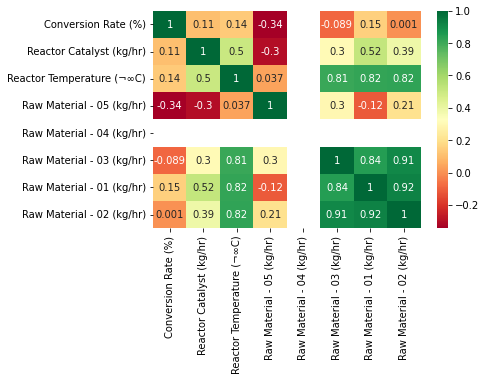

In [7]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

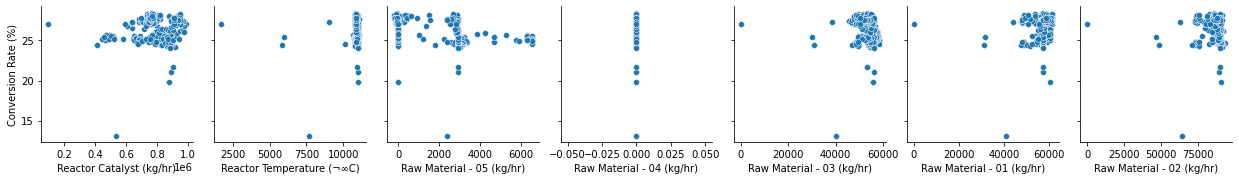

In [8]:
sns.pairplot(df, y_vars=['Conversion Rate (%)'], x_vars=['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'])
plt.show()

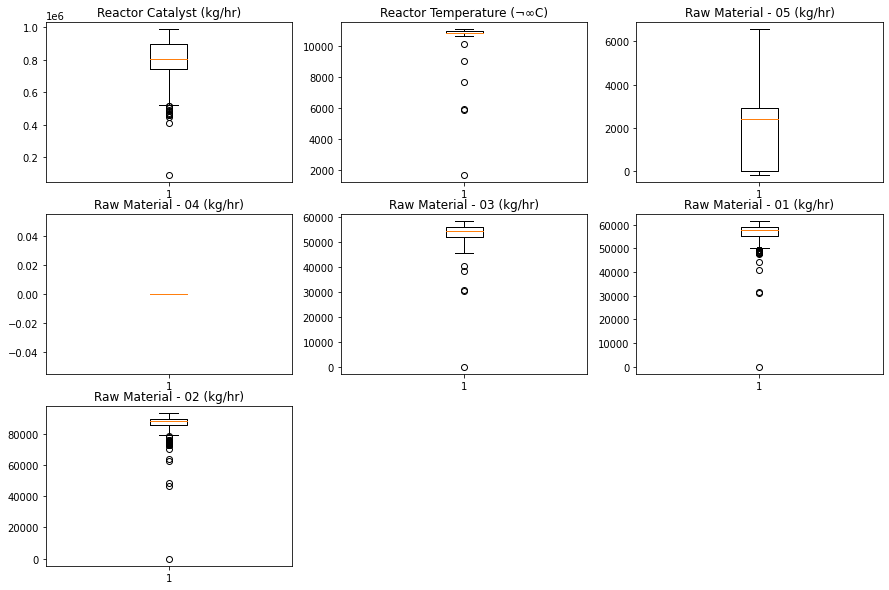

In [9]:
features = ['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)']
plt.figure(figsize=(15,10))
# loop through tickers and axes
for i in enumerate(features):
    # filter df for ticker and plot on specified axes
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(i[1], data=df)
    plt.title(i[1])

plt.show()

In [10]:
df.shape

(269, 9)

In [11]:
num_var = df.select_dtypes(include='float64')
num_var = num_var.columns
num_var

Index(['Conversion Rate (%)', 'Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'],
      dtype='object')

In [12]:
# outlier treatment using I!R
for i in num_var:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]

In [13]:
df.shape

(263, 9)

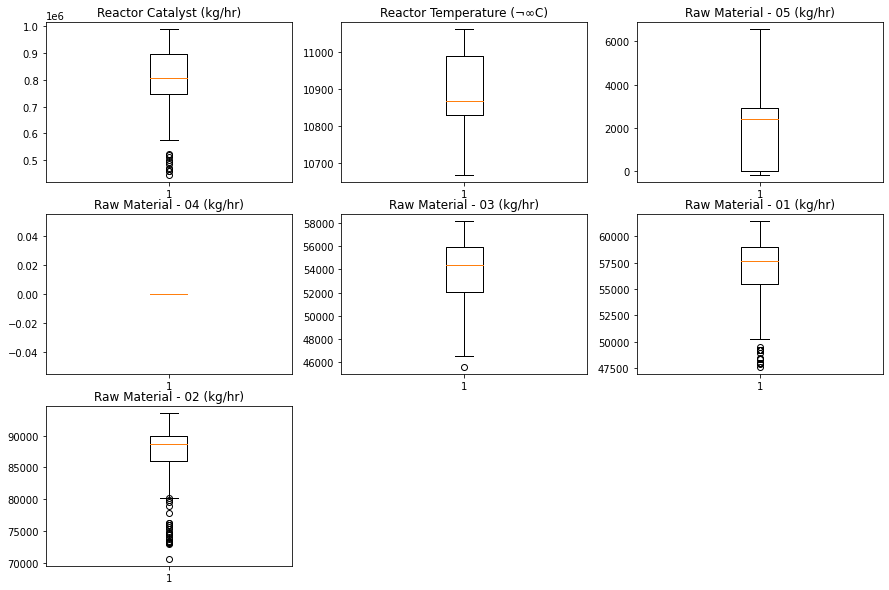

In [14]:
plt.figure(figsize=(15,10))
# loop through tickers and axes
for i in enumerate(features):
    # filter df for ticker and plot on specified axes
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(i[1], data=df)
    plt.title(i[1])

plt.show()

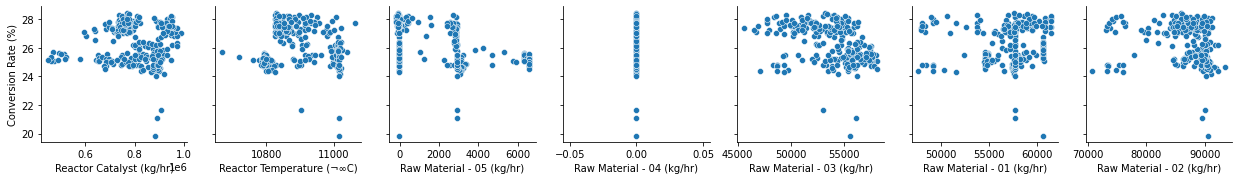

In [15]:
sns.pairplot(df, y_vars=['Conversion Rate (%)'], x_vars=['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 04 (kg/hr)', 'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'])

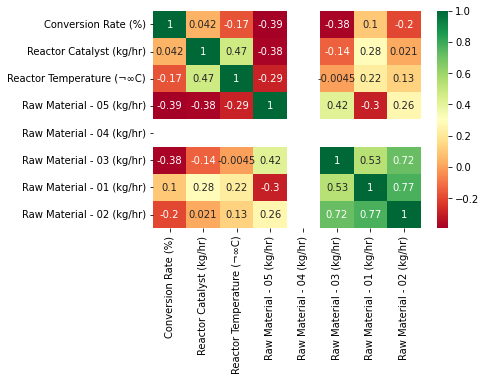

In [16]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [47]:
#There is very little correlation between target variable and feature variables

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.iloc[:,2:]
y= df.iloc[:, 1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.7, random_state=100)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(184, 7)
(79, 7)
(184,)
(79,)


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rfr = RandomForestRegressor(random_state=100)

In [23]:
rfm = rfr.fit(X_train, y_train)

In [24]:
print('The training score is: %.2f'%rfm.score(X_train, y_train))

The training score is: 0.93


In [25]:
ytrain_pred = rfm.predict(X_train)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

In [27]:
ytrain_pred = rfm.predict(X_train)

In [28]:
print('The training MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

print('The training MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

print('The training EV is: %.2f'% explained_variance_score(y_train, ytrain_pred))

print('The training r2_score is: %.2f'% r2_score(y_train, ytrain_pred))

The training MAE is: 0.22
The training MSE is: 0.12
The training EV is: 0.93
The training r2_score is: 0.93


In [29]:
ytest_pred = rfm.predict(X_test)

ytest_pred[:10]

array([26.5235, 27.5179, 27.6068, 27.5318, 27.3543, 27.4808, 25.7305,
       24.7691, 23.9942, 26.899 ])

In [30]:
print('The test MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))

print('The test MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

print('The test EV is: %.2f'% explained_variance_score(y_test, ytest_pred))

print('The test r2_score is: %.2f'% r2_score(y_test, ytest_pred))

The test MAE is: 0.52
The test MSE is: 0.65
The test EV is: 0.70
The test r2_score is: 0.68


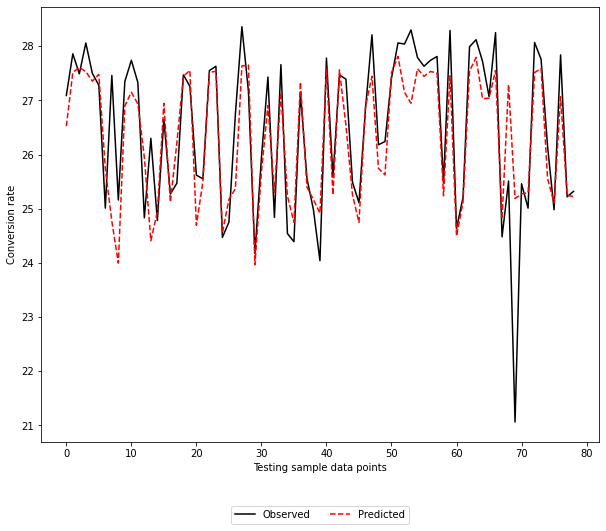

In [31]:
plt.figure(figsize=(10,8))
x_axis = range(len(X_test))

plt.plot(x_axis, y_test, label='Observed', color='k', linestyle='-')
plt.plot(x_axis, ytest_pred, label='Predicted', color='r', linestyle='--')

plt.ylabel('Conversion rate')
plt.xlabel('Testing sample data points')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2)
plt.show()

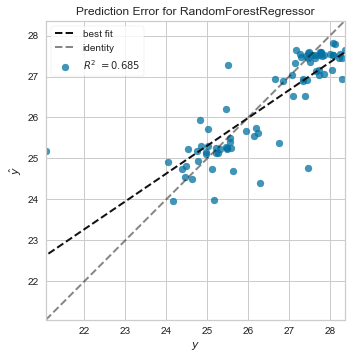

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rfm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

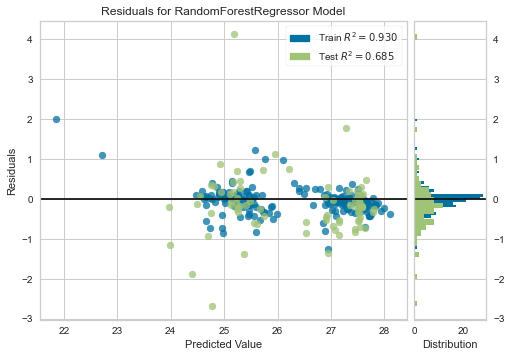

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rfm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [37]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score

In [38]:
#Random Forest feature ranking
from sklearn.pipeline import Pipeline

In [40]:
feature_list = list(X.columns)
feature_importance = pd.Series(rfm.feature_importances_, index=feature_list).sort_values(ascending=False)

In [41]:
print(feature_importance)

Raw Material - 05 (kg/hr)    0.418809
Reactor Temperature (¬∞C)    0.282957
Reactor Catalyst (kg/hr)     0.085272
Raw Material - 01 (kg/hr)    0.073380
Raw Material - 03 (kg/hr)    0.070131
Raw Material - 02 (kg/hr)    0.069451
Raw Material - 04 (kg/hr)    0.000000
dtype: float64
